# Práctica 1: Aprendizaje automático

__Fecha de entrega: 13 de Marzo de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

## Apartado 3: Regresión

__Número de grupo: 13__

__Nombres de los estudiantes: Esther Babon Arcauz y Claudia López-Mingo Moreno__

En este notebook trabajaremos con un conjunto de datos tomado del repositorio de la Universidad de California Irvine. En concreto, se trata de un conjunto de datos sobre distintos vinos del norte de Portugal (vinho verde)  que puedes encontrar [aquí](https://archive.ics.uci.edu/ml/datasets/wine+quality). 

El objetivo es modelar la calidad del vino (con un valor de 0 a 10) en base a variables que reflejan sus propiedades físicas y químicas. En concreto, las propiedades son las siguientes:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol 

De cara a la memoria que vas a realizar puedes investigar sobre estas propiedades para explicar mejor qué miden y cómo afectan al vino. 

La calidad del vino es una variable que toma valores entre 0 y 10. 

Para modelar la relación entre la calidad del vino y sus propiedades usaremos una red neuronal. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving calidad_vinos.csv to calidad_vinos.csv


In [3]:
##creamos una variable para usar siempre el mismo random_state
RANDOM_STATE = 333

### 1) Descripción de los datos

Carga el fichero de datos `calidad_vinos.csv` en un dataframe. 

Describe el conjunto de datos e identifica aquella variable que tiene unos valores extremos más acusados con respecto a la media, y aquella que está más concentrada en torno a la media. Reflexiona sobre la posible influencia de estas variables a la hora de entrenar el perceptrón multicapa.

Estudia la distribución de la calidad del vino en el conjunto de datos.

In [4]:
##cargamos el fichero de datos en un dataframe 
df = pd.read_csv('calidad_vinos.csv')

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


La variable que tiene valores extremos con respecto a su valor medio es `total sulfur dioxide` con un valor medio de 46.467792 y un valor máximo de 289.
Por otro lado la variable que se concentra en torno a su valor medio es `density` con un valor medio de 0.996747 y un valor máximo de 1.003690.

Las funciones de activación de la capa de salida de un perceptrón multicapa, dependen de los rangos de
las variables que estamos modelando, por esto mismo influye sobre que rango de valores estan nuestras variables. 

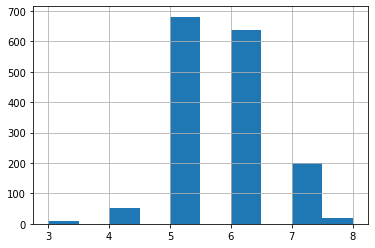

In [6]:
##Estudiamos la distribución de la calidad del vino en el conjunto de datos.
df['quality'].hist()

Primero vemos que la distribución de la variable quality en los datos dados esta en el rango [3,8], cuando en la descripción del problema nos dicen que esta variable toma valores de [0,10]. Vemos que el valor medio esta en 5.636023, ya que la mayoria de los casos tienen valores de 5 y 6 para la variable `quality`. Vemos una figura muy parecida a la distribución normal.

In [7]:
df.groupby(['quality']).describe()

fixed acidity                                                     \
                count      mean       std  min   25%   50%     75%   max   
quality                                                                    
3                10.0  8.360000  1.770875  6.7  7.15  7.50   9.875  11.6   
4                53.0  7.779245  1.626624  4.6  6.80  7.50   8.400  12.5   
5               681.0  8.167254  1.563988  5.0  7.10  7.80   8.900  15.9   
6               638.0  8.347179  1.797849  4.7  7.00  7.90   9.400  14.3   
7               199.0  8.872362  1.992483  4.9  7.40  8.80  10.100  15.6   
8                18.0  8.566667  2.119656  5.0  7.25  8.25  10.225  12.6   

        volatile acidity            ... sulphates       alcohol             \
                   count      mean  ...       75%   max   count       mean   
quality                             ...                                      
3                   10.0  0.884500  ...     0.615  0.86    10.0   9.955000   
4                   53.0  0.693962  ...     0.600  2.00    53.0  10.265094   
5                  681.0  0.577041  ...     0.660  1.98   681.0   9.899706   
6                  638.0  0.497484  ...     0.750  1.95   638.0  10.629519   
7                  199.0  0.403920  ...     0.830  1.36   199.0  11.465913   
8                   18.0  0.423333  ...     0.820  1.10    18.0  12.094444   

                                                      
              std  min     25%     50%     75%   max  
quality                                               
3        0.818009  8.4   9.725   9.925  10.575  11.0  
4        0.934776  9.0   9.600  10.000  11.000  13.1  
5        0.736521  8.5   9.400   9.700  10.200  14.9  
6        1.049639  8.4   9.800  10.500  11.300  14.0  
7        0.961933  9.2  10.800  11.500  12.100  14.0  
8        1.224011  9.8  11.325  12.150  12.875  14.0  

[6 rows x 88 columns]

quality
3    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
4    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
5    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
6    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
7    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
8    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
dtype: object

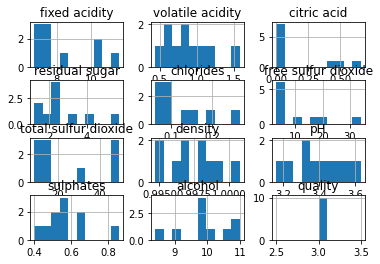

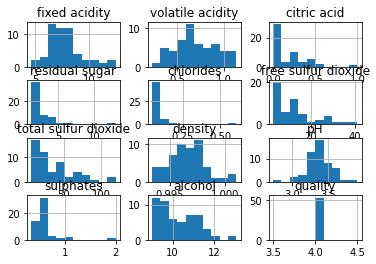

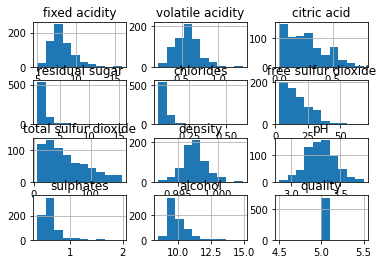

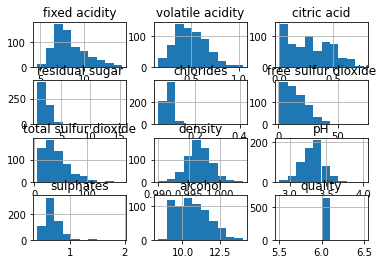

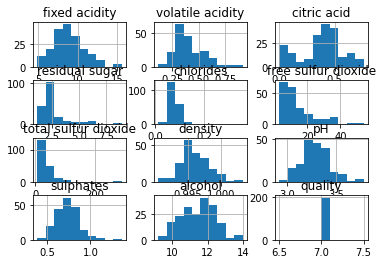

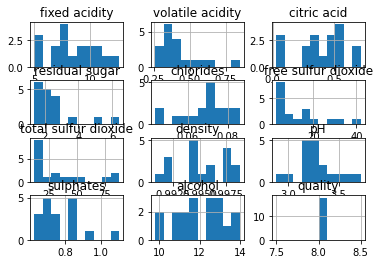

In [8]:
df.groupby(['quality']).hist()

In [9]:
df.groupby(['quality']).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


Si observamos las medias de las variables agrupadas por calidad podemos observar lo siguiente:

-fixed acidity: tiene un valor bastante estable para todos los valores de calidad (en torno al 8)

-volatile acidity: es inversamente proporcional a la calidad

-citric acid: es proporcional a la calidad pero varía muy poco

-residual sugar: no varía significativamente

-chlorides: disminuye visiblemente a medida que aumenta la calidad

-free sulfur dioxide: los valores altos se encuentran en las calidades medias mientras que los bajos están en las calidades altas y bajas

-total sulfur dioxide: se comporta de la misma manera que la variable anterior

-density: la densidad se mantiene casi uniforme independientemente de la calidad

-ph: cuanto más bajo, mayor es la calidad

-sulphates: a más cantidad de sulfatos obtenemos mayor calidad en el vino

-alcohol: En los valores para baja calidad vemos que no hay una tendencia clara, sin embargo en alta calidad podemos observar que el nivel de alcohol es mayor.

Estudiamos la distribución de la variable `quality`sobre las demás. Son muchos datos. A continuación vamos a ver como esta distribuido para las variables limite (la variable que tiene valores estremos con respecto a su valor medio y  la variable que se concentra en torno a su valor medio )

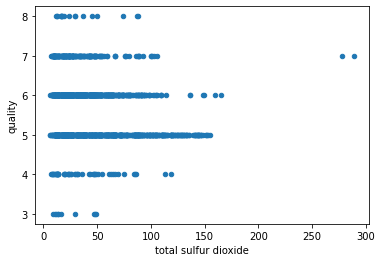

In [10]:
df.plot.scatter(x='total sulfur dioxide', y='quality')

En esta caso, con la variable que tiene valores estremos con respecto a su valor medio, `total sulfur dioxide`, efectivamente vemos que muchos de los puntos estan cerca de los mimos valores de `total sulfur dioxide`, pero hay unos pocos que se van a valores muy grandes. Se ve muy bien para el valor 7 de `quality`. 

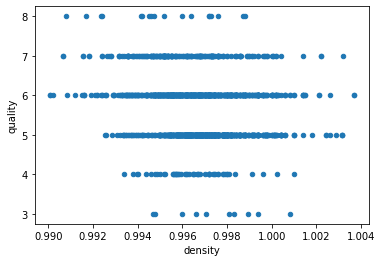

In [11]:
df.plot.scatter(x='density', y='quality')

Por otro lado, en el caso en el que la variable que se concentra en torno a su valor medio, vemos que para los valores medios de densidad podemos encontrarnos con cualquier valor de calidad. Sin embargo, cuanto más extremo es el valor de calidad, tenemos menos individuos con valores extremos de densidad. 

### 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga la calidad y, selecciona las variables que estén más correlacionadas con él (estableciendo para ello un valor umbral que consideres adecuado).

In [12]:
##sacamos la correlación entre quality y las demas
correlation = df.corr()
correlation['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [13]:
#para mostrar sólo las que superen el umbral de 0.25 de correlación
correlation[abs(correlation['quality']) > 0.25]['quality']

volatile acidity   -0.390558
sulphates           0.251397
alcohol             0.476166
quality             1.000000
Name: quality, dtype: float64

In [14]:
##creamos un nuevo dataframe con las que pasan el umbral
df_umbral = df.loc[:,['volatile acidity','sulphates','alcohol','quality']]
df_umbral

,volatile acidity,sulphates,alcohol,quality
0,0.700,0.56,9.4,5
1,0.880,0.68,9.8,5
2,0.760,0.65,9.8,5
3,0.280,0.58,9.8,6
4,0.700,0.56,9.4,5
...,...,...,...,...
1594,0.600,0.58,10.5,5
1595,0.550,0.76,11.2,6
1596,0.510,0.75,11.0,6
1597,0.645,0.71,10.2,5


### 3) Normalización

Decide si debes o no normalizar los datos de entrada y/o de salida. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.


El MLP puede tratar con variables sin normalizar o sin estandarizar, sin embargo, la normalización o estandarización de las variables disminuye el tiempo de entrenamiento y evita los “mínimos locales” en la optimización del error.

In [15]:
from sklearn.preprocessing import StandardScaler

##creamos un nuevo dataframe y copiamos el df_umbral
df_escalado = df_umbral.copy()

# Transformamos las variables de entrada y de salida con el standard scaler 
scaler = StandardScaler()

df_escalado[['volatile acidity e','sulphates e','alcohol e']] = scaler.fit_transform(df_umbral[['volatile acidity','sulphates','alcohol']])

##en df_escalado guardamos los datos originales y los escalados
##y en df_e solo los escalados  sin quality
df_e_data = df_escalado.loc[:,['volatile acidity e','sulphates e','alcohol e']].copy()
df_e_target = df_umbral.loc[:,['quality']].copy()

df_e_data
df_e_target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


La normalización de datos se basa en transformar los valores para que se repartan entre los intervalos min (0) y max (1). 
Por otro lado, la estandarización se basa en transformar los valores para que se repartan entre la media  (0) y la deviación estandar (1). En nuestro caso usaremos la estandarización ya que mantiene  información útil sobre valores atípicos y hace que el algortimo que vayamos a usar sea menos sensible a estos valores. 


### 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 250 neuronas
- La segunda con varias capas ocultas entre las que debes distribuir 250 neuronas, como te parezca

Asegúrate de que no salen warnings durante el entrenamiento indicando que no se ha alcanzado la convergencia durante el entrenamiento (para arreglarlo basta con poner un número de max_iter suficientemente grande).

En la configuración del perceptrón debes usar validación cruzada y explorar varios valores para el parámetro `alpha` que controla el coeficiente de regularización L2.

Para elegir el valor adecuado de dicho coeficiente pinta la curva de aprendizaje para cada perceptrón. En la curva debes pintar una línea que represente el error medio de las distintas particiones de validación y un área sombreada que represente la desviación típica. 

Una vez tengas la curva de aprendizaje: 
  - Identifica las diferencias de comportamiento entre ambos perceptrones, razona o especula sobre por qué se dan. ¿Hay alguno que domine al otro? ¿Es el comportamiento de uno más volátil que el del otro?
  - Determina de manera razonada con qué perceptrón te quedas y el valor óptimo del parámetro de regularización.


In [16]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

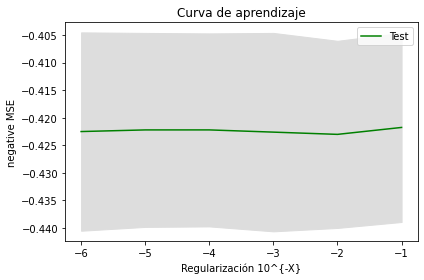

In [17]:
##RED NEURONAL 1 
##Capa ocuñta de 250 neuronas 
##max_iter = 500 para que no de warnings
##validación cruzada
##regularización L2 

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(250, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, df_e_data.to_numpy(), df_e_target.to_numpy().ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Podemos obsevar un comportamiento bastante estable para este parámetro. Parece que el mejor valor (el más cercano a cero) es con  α=10−1 .

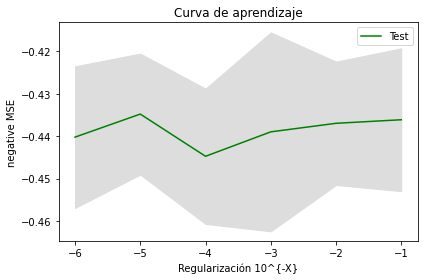

In [18]:
##RED NEURONAL 2 
##3 capas neuronales una de 100 otra de 50 y otra de 100
##max_iter = 500 para que no de warnings
##validación cruzada
##regularización L2 

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(100,50,100), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, df_e_data.to_numpy(), df_e_target.to_numpy().ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Por otro lado, en esta red neuronal el comportamiento no es estable como el anterior. Parece que el mejor valor (el más cercano a cero) es con α=10−5 .

La primera diferencia entre los dos perceptrones es que el primero es simple (una capa oculta de 250 neuronas) y el segundo es multicapa (varias capas ocultas con un numero total de 250 neuronas).

El perceptrón simple es una combinación lineal de las variables de
entrada, y por tanto permite “configurar” un hiperplano que separe dos
clases.

En el perceptrón multicapa la combinación de neuronas es en diferentes
capas, permite crear diferentes hiperplanos que al combinarse
linealmente en la siguiente capa crean hipersuperficies no lineales que
permiten separar las .

En principio, un perceptron con una única capa oculta y “suficientes”
neuronas, puede resolver igual un problema que un perceptron con más
capas ocultas.

Determinamos el número de capas y de neuronas 
probando varias configuraciones y determinando la mejor mediante
validación cruzada

Hemos determinado que el mejor perceptron es el simple,ya que su curva de aprendizaje es mejor y más estable que la del perceptrón multicapa. Parece que el mejor valor (el más cercano a cero) del parámetro de regularización es con α = 10−1 .

### 5) Medición y análisis del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción de la calidad de todos los vinos usando validación cruzada. 

A continuación:
- Muestra varias medidas de error y razona sobre si el error te parece pequeño o no para el problema que estás analizando
- Muestra el histograma de la distribución del error o del error en valor absoluto, y razona de nuevo si te parece que el modelo ha predicho bien o no. Identifica los vinos para los cuales el modelo ha fallado más.
- Analiza el error cometido para los vinos según su puntuación de calidad observada (3, 4, etc). Describe lo que sucede, explica por qué crees que sucedió y razona de nuevo si te parece que el modelo funciona bien o tiene limitaciones. 

In [32]:

# Creamos el clasificador con la mejor configuración del apartado anterior
regul_param=0.1
mlp=MLPRegressor(hidden_layer_sizes=(250, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
##sacamos directamente la estimacion con los datos sin escalar
df_umbral_data = df_umbral.loc[:,['volatile acidity','sulphates','alcohol']].copy()
predicts = cross_val_predict(mlp, df_umbral_data.to_numpy(), df_e_target.to_numpy().ravel(), cv= 10)

In [33]:
errors = np.abs(df_e_target.to_numpy() - predicts) # error en cada ejemplo
mean_error = np.mean(errors)
std_error = np.std(errors)
mean_price = np.mean(df_e_target.to_numpy())

print('Error medio:', mean_error)
print('Desviación típica:', std_error)
print('Error medio en %:', mean_error/mean_price*100)

Error medio: 0.7498975404258339
Desviación típica: 0.5724653085972422
Error medio en %: 13.305439049499649


Nuestro modelo comete un error medio de 13.3% con una desviación típica bastante pequeña. Seguramente un error medio del 13.3% no es muy buen resultado.

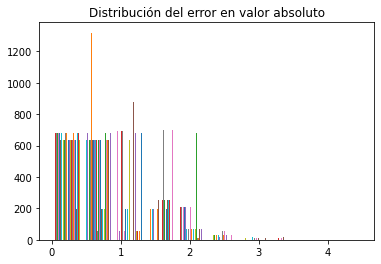

In [27]:
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(errors)

plt.title('Distribución del error en valor absoluto')
plt.show()

Aunque la mayor parte de los errores se concentran en la parte izquierda de la gráfica, también hay muchos errores demasiado elevados que no son deseables.
El modelo ha fallado más en los vinos de calidad 0, 1, 2 y 3

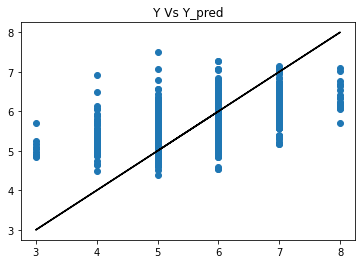

In [28]:
##Vamos a dibujar la distancia entre el valor predicho por el modelo y el valor real en una gráfica.
##La diagonal representa error 0.
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(df_e_target.to_numpy(), predicts) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(df_e_target.to_numpy(), df_e_target.to_numpy(), color='k') 

plt.title('Y Vs Y_pred')
plt.show()

Al pintar el gráfico vemos que hay gran desviación en todos los valores. Si no hubiese desviación los puntos deverian concentrarse sobre la linea diagonal. 

Esto seguramente quiere decir que se pueda mejorar la estimación y que hay que hacer algo con los valores superiores del rango.

El modelo tiene limitaciones. 